<a href="https://colab.research.google.com/github/UoA-eResearch/deep-learning-tutorial-2019/blob/master/Exercise%202%20-%20multi-class%20iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 2: The Iris Dataset
In this exercise we will create a neural network to classify 3 different types of Iris (Setosa, Versicolor and Virginica) based on their sepal length, sepal width, petal length and petal width.

![Irises](http://dataaspirant.com/wp-content/uploads/2017/01/irises.png)

This is a multi class classification problem. It is similar to the Pima Indian's binary classification exercise, but with three classes to predict instead of two.

### Q: How many steps are there in creating a neural network model? Please list those steps

*answer...*

### Import dependencies
Start by importing the dependencies we will need for the project

In [0]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

In [0]:
def plot_acc_loss(history):
    f, (ax1, ax2) = plt.subplots(2,1, figsize=(10,10))
    
    # Summarize history of accuracy
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('model loss')
    ax1.legend(['train', 'test'], loc='upper left')
    
    # Summarize history of accuracy
    ax2.plot(history.history['acc'])
    ax2.plot(history.history['val_acc'])
    ax2.set_title('model accuracy')
    ax2.set_xlabel('epoch')
    ax2.legend(['train', 'test'], loc='upper left')
    
    plt.subplots_adjust(hspace=0.5)
    plt.show()
    
def draw_confusion_matrix(true, pred, labels):
  """
  Drawing confusion matrix
  """
  
  cm = metrics.confusion_matrix(true, pred, labels)
  ax = plt.subplot()
  sns.heatmap(cm, annot=True, ax=ax)
  ax.set_xticklabels(['']+labels)
  ax.set_yticklabels(['']+labels)
  ax.set_xlabel("Predicted")
  ax.set_ylabel("True")
  plt.show()
  
  return cm

### Set seed
Set a seed value so that when we repeatedly run our code we will get the same result. Using the same seed is important when you want to compare algorithms.

In [0]:
seed = 7
np.random.seed(seed)

### Import data
The Iris dataset contains four features from 150 different Iris flowers. The features in the dataset are described below.

* Sepal length (cm)
* Sepal width (cm)
* Petal length (cm)
* Petal width (cm)
* Class: Iris setosa, Iris versicolor or Iris virginica

Sepals are the part of a flower that protect and support the petals. The petals surround the reproductive parts of the flower.

![Iris labeled](http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg)

A snapshot of the dataset is illustrated below (not in order).

|Sepal Length|Sepal Width|Petal Length|Petal Width|Class|
|---|---|---|---|-----------|
|5.1|3.5|1.4|0.2|Iris-setosa|
|4.9|3.0|1.4|0.2|Iris-setosa|
|7.0|3.2|4.7|1.4|Iris-versicolor|
|6.4|3.2|4.5|1.5|Iris-versicolor|
|6.3|3.3|6.0|2.5|Iris-virginica|
|5.8|2.7|5.1|1.9|Iris-virginica|

To load this data into memory, use the `np.loadtxt` function. The data type (`dtype`) is set to `str` because our input data is a mix of numbers and strings. This will be dealt with when we split the data.

In [4]:
data = np.loadtxt('https://raw.githubusercontent.com/UoA-eResearch/deep-learning-tutorial-2019/master/data/iris.csv', delimiter=",", dtype=str)
print(data[:6]) #Show the first 6 rows

[['5.1' '3.5' '1.4' '0.2' 'Iris-setosa']
 ['4.9' '3.0' '1.4' '0.2' 'Iris-setosa']
 ['4.7' '3.2' '1.3' '0.2' 'Iris-setosa']
 ['4.6' '3.1' '1.5' '0.2' 'Iris-setosa']
 ['5.0' '3.6' '1.4' '0.2' 'Iris-setosa']
 ['5.4' '3.9' '1.7' '0.4' 'Iris-setosa']]


Separate the data into input (X) and output (y) variables.

Note that we convert the input data into floats.

In [0]:
X = data[:, 0:4].astype(float)
y = data[:, 4]

If you look carefully at the target values, you will notice that they are strings, i.e. 'Iris-setosa', 'Iris-versicolor' and 'Iris-virginica'.

**Keras needs numbers or matrices to work with, so we will need to reformat the target values.**

The problem with converting the class values to numbers (e.g. 'Iris-setosa' becomes 0, 'Iris-versicolor' 1 etc) is that it implies that the target values are ordinal. That is, 'Iris-setosa' is somehow less than 'Iris-versicolor', which is not the case for this dataset.

A better way to represent classes in a multi-class classification problem, is to 'one hot encode' the target values. An example is shown below. A matrix of zeros is generated. Each row corresponds to a sample and each column corresponds to a particular class. A 1 is placed into the column to incidicate the class that it belongs too.

|Iris-setosa|Iris-versicolor|Iris-virginica|
|---|---|---|
|1|0|0|
|0|1|0|
|0|0|1|

One hot encoding is a two step process. First encode the target values (y) into an array of numbers using the `LabelEncoder` from scikit-learn and then one hot encode the numbers with the `np_utils.to_categorical` function.

In [6]:
y_encoded = LabelEncoder().fit(y).transform(y) # Convert the classes into numbers
y_encoded[45:55]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [7]:
y_one_hot_encoded = np_utils.to_categorical(y_encoded) # One hot encode the numbers
y_one_hot_encoded[45:55]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

Like the previous exercise, use the `train_test_split` function from scikit-learn to split the input and target data into training, validation and test datasets.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot_encoded, test_size=0.2, random_state=seed)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)

### Create the model
The code snippet below creates a very basic neural network model, with three layers: an input layer, a hidden layer and an output layer.

The first layer is a fully connected `Dense` layer. We use four neurons in the hidden layer and have 4 input neurons for the 4 features.

The last layer has 3 neurons, one for each class.

In [11]:
model = Sequential()
model.add(Dense(4, input_dim=4, activation='relu', kernel_initializer='normal'))
model.add(Dense(3, activation='sigmoid', kernel_initializer='normal'))

W0707 22:37:11.838513 140647477626752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0707 22:37:11.885571 140647477626752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0707 22:37:11.893080 140647477626752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



### Compile the model
We then compile the model. The loss function is set to `categorical_crossentropy` (different from the loss function used in the binary classification exercise) because we are performing multi-class classification.

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0707 22:37:12.147542 140647477626752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0707 22:37:12.189562 140647477626752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



### Fit the model
Now that we have compiled the model, we can train it with the data we prepared earlier. We are using more epochs but a smaller batch size than the previous exercise.

To see the model training history in text, just don't include `verbose=0`

In [13]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=5)

W0707 22:37:12.343251 140647477626752 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0707 22:37:12.394557 140647477626752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 96 samples, validate on 30 samples
Epoch 1/200
96/96 [==============================] - 1s 8ms/step - loss: 1.0998 - acc: 0.3438 - val_loss: 1.0992 - val_acc: 0.2333
Epoch 2/200
96/96 [==============================] - 0s 313us/step - loss: 1.0972 - acc: 0.5833 - val_loss: 1.0969 - val_acc: 0.6000
Epoch 3/200
96/96 [==============================] - 0s 284us/step - loss: 1.0953 - acc: 0.6458 - val_loss: 1.0948 - val_acc: 0.6000
Epoch 4/200
96/96 [==============================] - 0s 262us/step - loss: 1.0926 - acc: 0.3854 - val_loss: 1.0912 - val_acc: 0.3667
Epoch 5/200
96/96 [==============================] - 0s 262us/step - loss: 1.0887 - acc: 0.3542 - val_loss: 1.0868 - val_acc: 0.3667
Epoch 6/200
96/96 [==============================] - 0s 272us/step - loss: 1.0836 - acc: 0.3438 - val_loss: 1.0805 - val_acc: 0.3667
Epoch 7/200
96/96 [==============================] - 0s 263us/step - loss: 1.0770 - acc: 0.3854 - val_loss: 1.0731 - val_acc: 0.4333
Epoch 8/200
96/96 [========

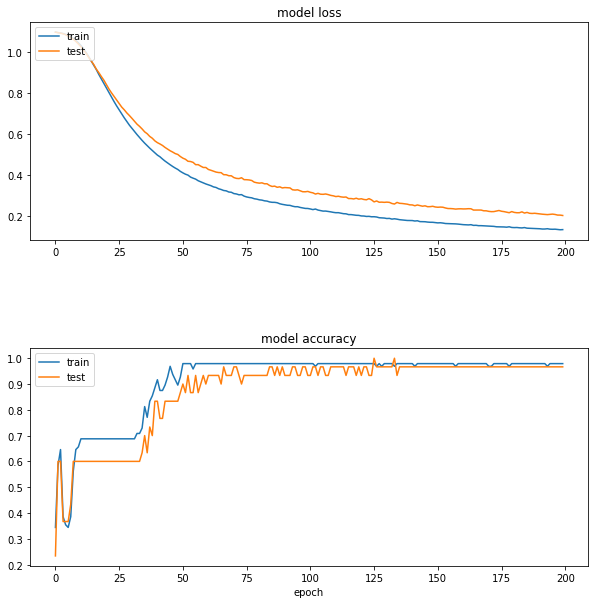

In [14]:
plot_acc_loss(history)

### Evaluate the model
Now that we have trained our model, we can evaluate the performance on the test data.

In [15]:
scores = model.evaluate(X, y_one_hot_encoded)
print("\n\n{0}: {1:.2f}%".format(model.metrics_names[1], scores[1]*100))

150/150 [==============================] - 0s 131us/step


acc: 97.33%


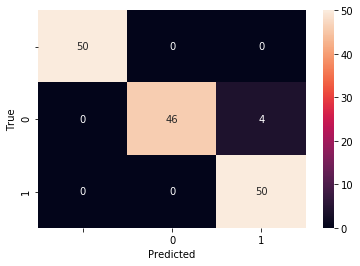

[[50  0  0]
 [ 0 46  4]
 [ 0  0 50]]


In [16]:
y_pred = model.predict_classes(X)
matrix = draw_confusion_matrix(y_encoded, y_pred, [0,1,2]) #[setosa,versicolor, virginica]

In [22]:
print("acc: {0:.2f}%".format(np.sum(np.diag(matrix))*100/np.sum(matrix)))

acc: 97.33%


# Key Points


*   Created a neural network to solve multiclass classification problem
*   "One hot encoded" to categorise string target variable
*  Different loss functions for different classfication problems
* Confusion matrix and model improvements


